# 📊 Data Visualization with ThreeWToolkit


This notebook demonstrates the data visualization capabilities of 3W Toolkit, using the following static methods of the class `DataVisualization`:

- `plot_series`: Visualizing individual time series with custom styling and event overlays
- `plot_multiple_series`: Comparing multiple time series in a single plot
- `correlation_heatmap`: Analyzing correlations between different features

We'll use the 3W dataset to demonstrate these visualization techniques with real-world data from oil well operations.


## 📚 Import Required Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization


## 🗃️ Loading the 3W Dataset


In [2]:
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset

# define path
dataset_path = "../../dataset/"

# create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False)
ds = ParquetDataset(ds_config)
len(ds)


[ParquetDataset] Dataset found at ../../dataset/
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


2228

Let's select the signal of any event:

In [3]:
sig = ds[1357]["signal"].copy()

-------

## 🔥 Correlation Heatmap

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/plot_1.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/plot_2.png'


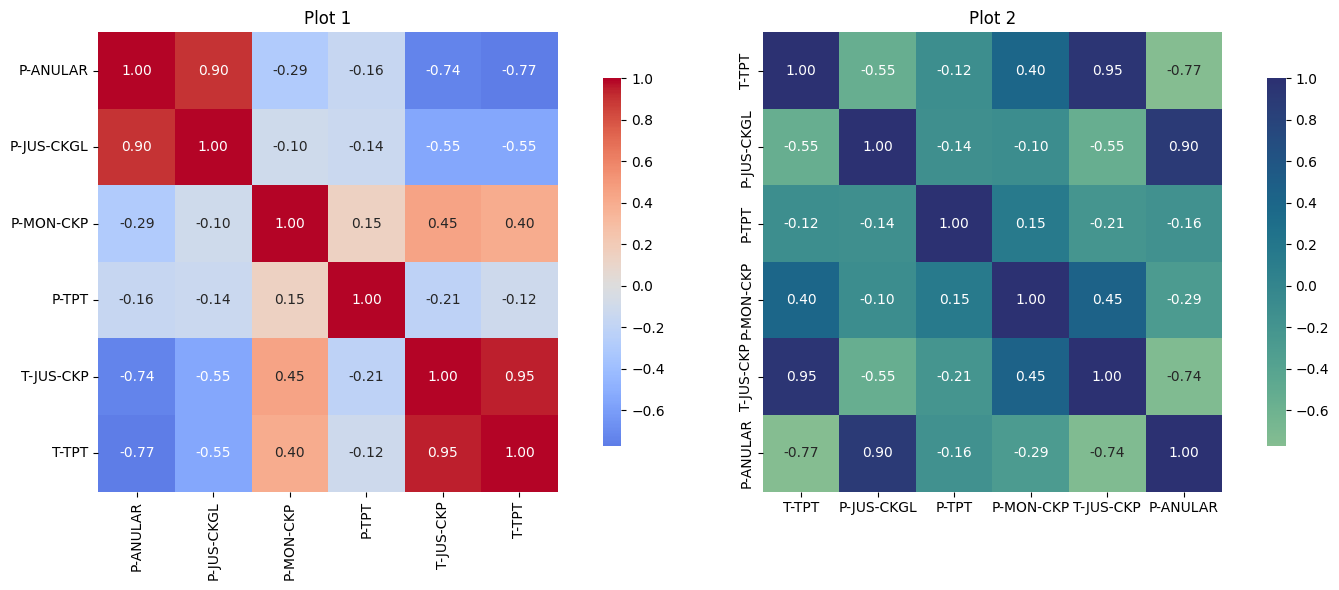

In [4]:
features_1 = ['P-ANULAR', 'P-JUS-CKGL', 'P-MON-CKP', 'P-TPT', 'T-JUS-CKP', 'T-TPT']
subset_1 = sig[features_1]

features_2 = ['T-TPT', 'P-JUS-CKGL', 'P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-ANULAR']
subset_2 = sig[features_2]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
DataVisualization.correlation_heatmap(subset_1, ax=axs[0], title="Plot 1", annot=True)
DataVisualization.correlation_heatmap(subset_2, ax=axs[1], title="Plot 2", cmap="crest", annot=True)
plt.tight_layout()
plt.show()


------

## 📈 Time-series visualization

### Plot Series - Individual Time Series Visualization

The `plot_series` method allows you to visualize individual time series with custom styling, titles, and event overlays for missing values.


#### Example 1: Simple Time Series Plot


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-tpt.png'


/tmp/ipykernel_203996/356871807.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


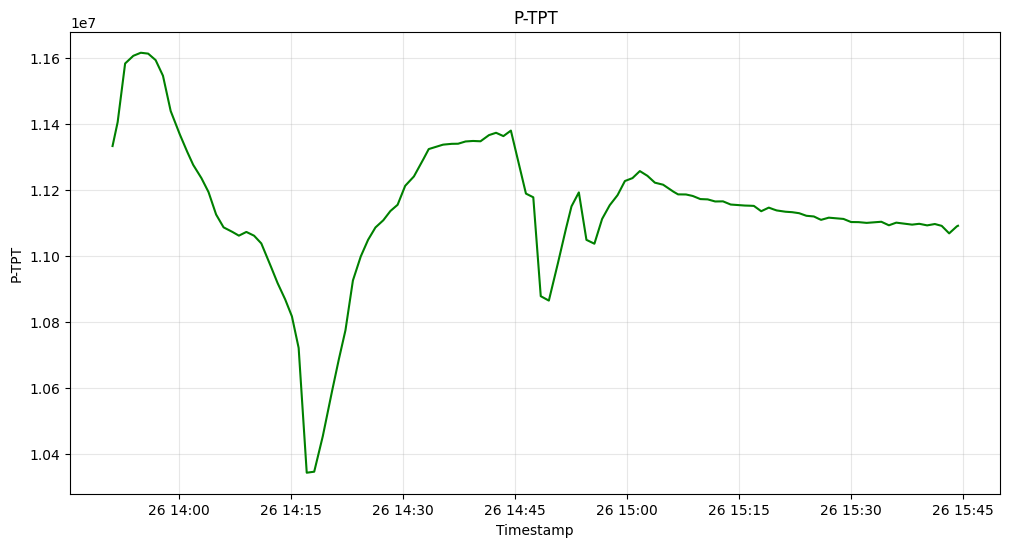

In [5]:
series = sig["P-TPT"]
fig,_ = DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green"
)
fig.show()


#### Example 2: Multiple Subplots


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-tpt.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-anular.png'


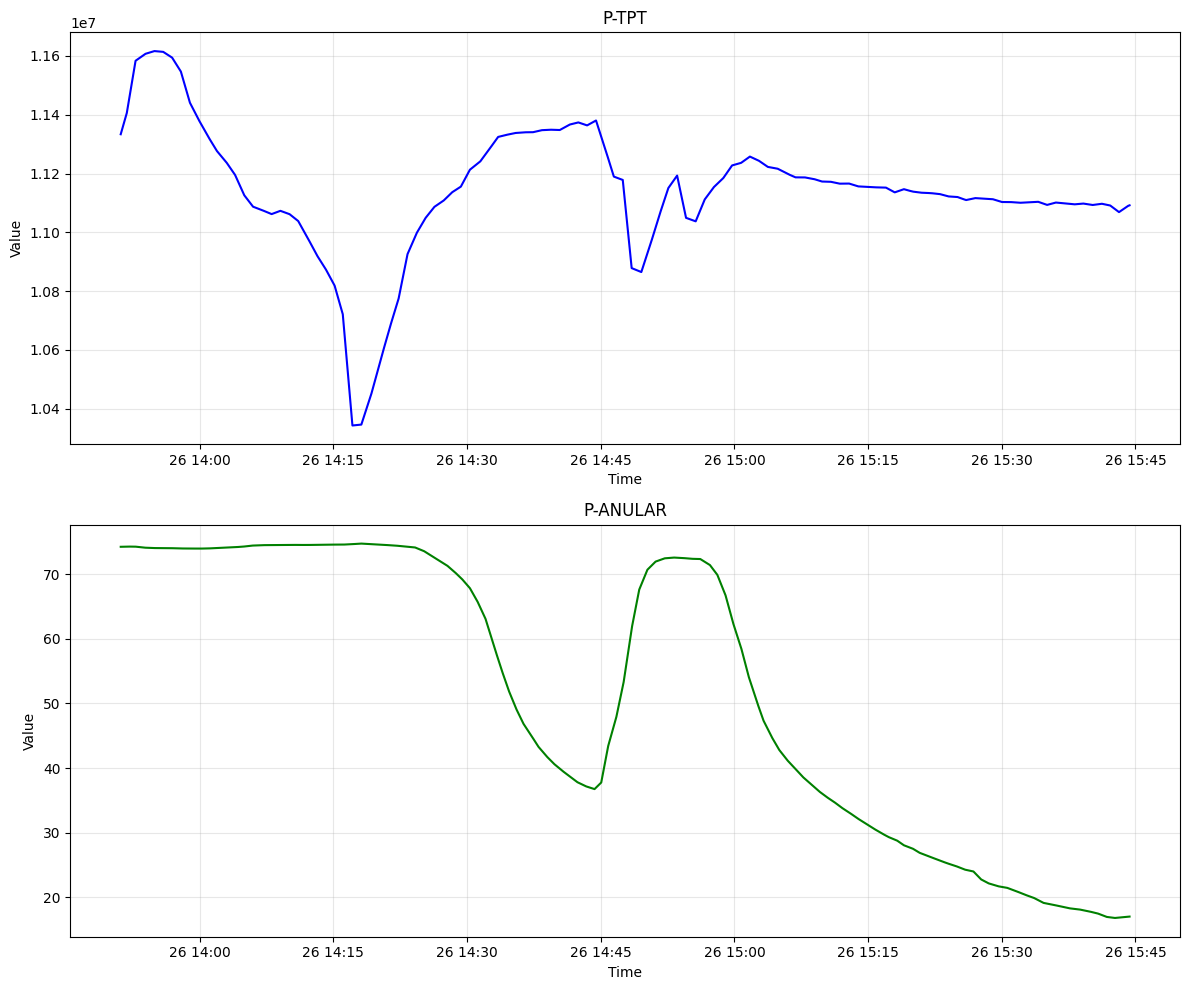

In [6]:
series_P_TPT = sig["P-TPT"]
series_P_ANULAR = sig["T-TPT"]

#create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

#use plot_series with specified Axes
DataVisualization.plot_series(series_P_TPT, "P-TPT", "Time", "Value", ax=axs[0], color="blue")
DataVisualization.plot_series(series_P_ANULAR, "P-ANULAR", "Time", "Value", ax=axs[1], color="green")

plt.tight_layout()
plt.show()


#### Example 3: Time Series with Missing Values (Event Detection)


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/event_series_with_nan_values.png'


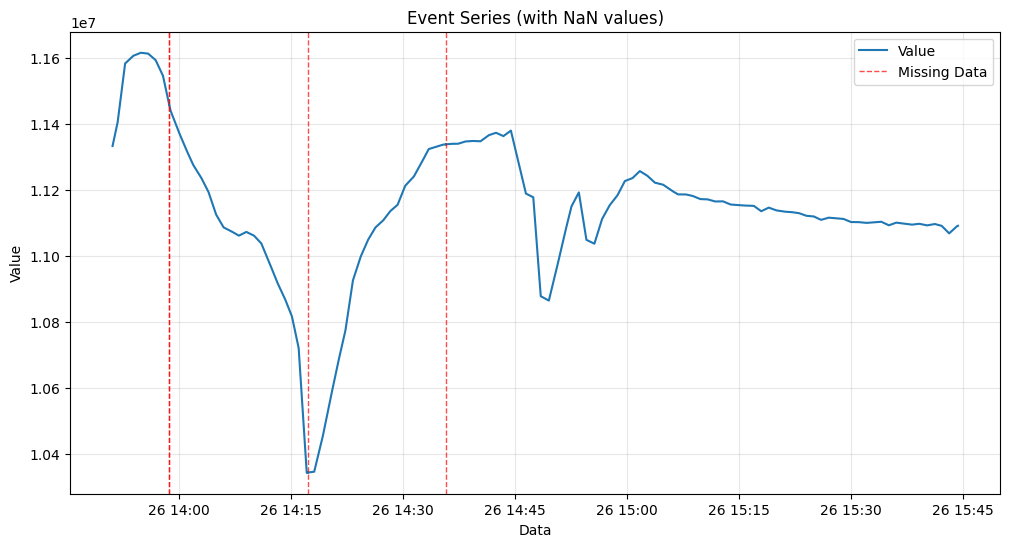

In [7]:
series_P_TPT = sig["P-TPT"].copy()
series_P_TPT.iloc[[456, 1567, 2678]] = np.nan  #adding NaNs

fig = DataVisualization.plot_series(
    series=series_P_TPT,
    title="Event Series (with NaN values)",
    xlabel="Data",
    ylabel="Value",
    overlay_events=True
)
plt.show()


---------

## 📊 Multiple Series - Comparing Multiple Time Series

The `plot_multiple_series` method allows you to visualize and compare multiple time series in a single plot, making it ideal for analyzing relationships between different sensors or features.


#### Example 1: Simple Multiple Time Series Comparison


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-anular_p-tpt.png'


/tmp/ipykernel_203996/2243740482.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


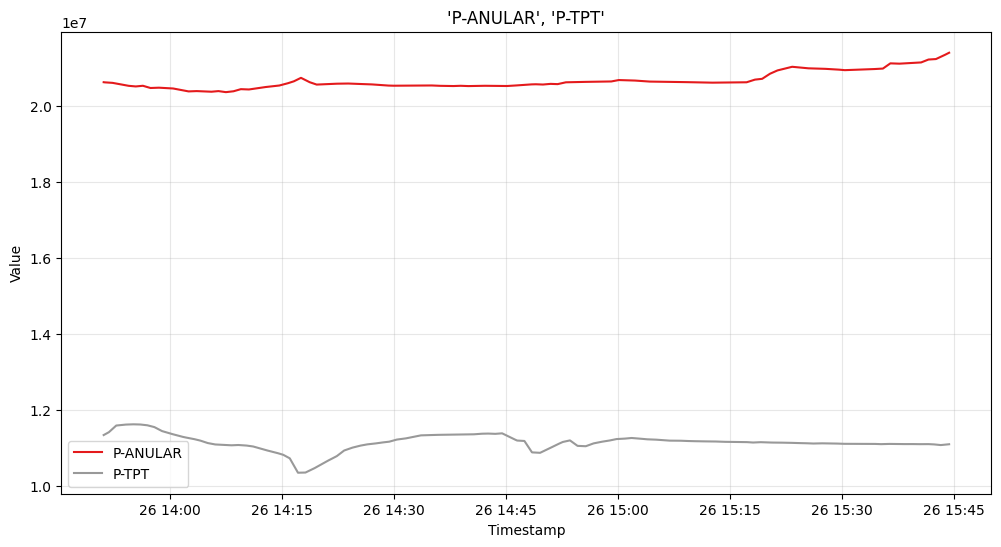

In [8]:
series_list = [sig["P-ANULAR"], sig["P-TPT"]]

fig,_ = DataVisualization.plot_multiple_series(
    series_list=series_list,
    labels=["P-ANULAR", "P-TPT"],
    title="'P-ANULAR', 'P-TPT'",
    xlabel="Timestamp",
    ylabel="Value"
)
fig.show()


#### Example 2: Using Subplots for Different Groups


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_1.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_2.png'


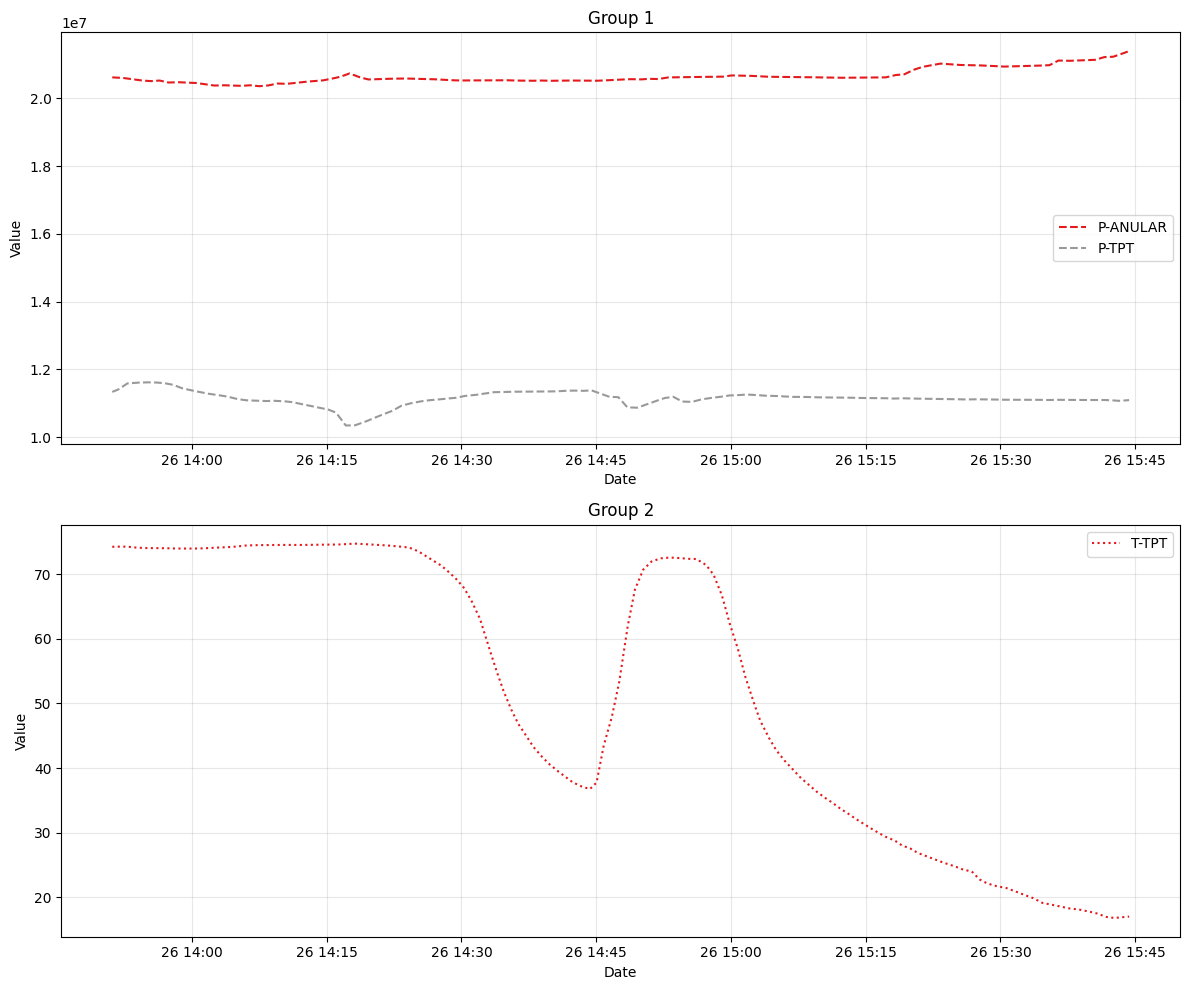

In [9]:
series_list_group1 = [sig["P-ANULAR"], sig["P-TPT"]]
series_list_group2 = [sig["T-TPT"]]


fig, axs = plt.subplots(2, 1, figsize=(12, 10))

#First plot: A and B
DataVisualization.plot_multiple_series(
    series_list=series_list_group1,
    labels=["P-ANULAR", "P-TPT"],
    title="Group 1",
    xlabel="Date",
    ylabel="Value",
    ax=axs[0],
    linestyle="--"
)

#Second plot: C and D
DataVisualization.plot_multiple_series(
    series_list=series_list_group2,
    labels=["T-TPT"],
    title="Group 2",
    xlabel="Date",
    ylabel="Value",
    ax=axs[1],
    linestyle=":"
)

plt.tight_layout()
plt.show()
